"""
Manipulation sur un champ de type datetime

Éditeur : Laurent REYNAUD
Date : 09-07-21
"""

In [32]:
import pandas as pd

In [33]:
"Chargement du fichier"

air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality.head(5)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [34]:
"Renommage de la colonne date.utc en datetime et affichage uniquement de cette colonne"

air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality['datetime']

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: object

In [35]:
"Type pour le champ datetime : str"

air_quality.dtypes

city          object
country       object
datetime      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [36]:
"Conversion d'un champ en str en un champ datetime avec l'instruction to_datetime()"

# Conversion du champ datetime initialement en str, en datetime
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality.dtypes


city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [37]:
"Trie par ordre chronologique avec le champ datetime"

air_quality.sort_values('datetime')

,city,country,datetime,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [38]:
"Jour le plus ancien du tableau"

air_quality['datetime'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [39]:
"Jour le plus récent du tableau"

air_quality['datetime'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [40]:

"Ecart en jours"
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [41]:
"Ajout d'une colonne contenant le mois du champ de type datetime"

air_quality['month'] = air_quality['datetime'].dt.month
air_quality

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


In [42]:
"""Concentration moyenne de NO2 pour chaque jour de la semaine pour chacun des emplacements de mesure
0 -> Lundi
6 -> Dimanche"""

air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

In [46]:
"Affichage pour chaque jour des valeurs enregistrées pour chaque emplacement de mesure"

no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


<AxesSubplot:xlabel='datetime'>

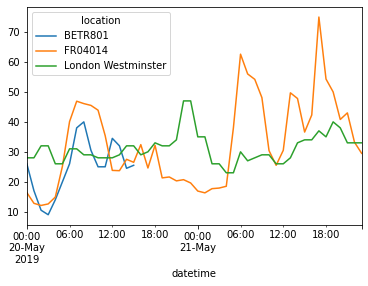

In [47]:
"Affichage des valeurs en 24 heures"

no_2["2019-05-20":"2019-05-21"].plot()